In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

In [78]:
import itertools

In [79]:
cereal_data = pd.read_csv("cereals.csv")
cereal_data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75
6,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00
7,Basic_4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75
8,Bran_Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67
9,Bran_Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67


In [80]:
cereal_data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000


In [117]:
cereal_data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1.00
2,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.50
4,Almond_Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75


In [113]:
def func(dataframe_col):
    for x in range(len(dataframe_col)):
        dataframe_col[x] = dataframe_col[x] / cereal_data["cups"][x]
    return dataframe_col

def df_func(df):
    for x in df.columns:
        x = func(x)
    return df

In [83]:
maybe = cereal_data
maybe = maybe.replace(-1, np.NaN)

In [84]:
maybe["calories"] = func(maybe["calories"])
maybe["protein"] = func(maybe["protein"])
maybe["fat"] = func(maybe["fat"])
maybe["sodium"] = func(maybe["sodium"])
maybe["fiber"] = func(maybe["fiber"])
maybe["carbo"] = func(maybe["carbo"])
maybe["sugars"] = func(maybe["sugars"])
maybe["potass"] = func(maybe["potass"])
maybe["vitamins"] = func(maybe["vitamins"])

/Users/ZSeaborn/Desktop/Homework/honey-nut-clusters/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [114]:
a_test = cereal_data.drop(["name", "mfr", "type", "weight"], axis=1)
#a_test.head()
a_test = df_func(a_test)

TypeError: unsupported operand type(s) for /: 'str' and 'numpy.float64'

In [86]:
maybe.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000
mean,143.272727,3.376623,1.259740,213.077922,3.596988,19.336341,9.341729,152.826171,36.831169,2.207792,1.029610,0.821039
std,60.173791,2.539369,1.584486,137.262979,5.683868,8.087133,5.895627,169.164774,26.687471,0.832524,0.150477,0.232716
min,50.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000
25%,110.000000,2.000000,0.000000,140.000000,1.000000,15.000000,3.000000,48.333333,25.000000,1.000000,1.000000,0.670000
50%,134.000000,3.000000,1.000000,223.000000,2.000000,17.705224,10.833333,95.000000,33.000000,2.000000,1.000000,0.750000
75%,160.000000,4.000000,2.000000,280.000000,4.000000,21.500000,13.358209,201.492537,37.000000,3.000000,1.000000,1.000000
max,440.000000,12.000000,9.000000,787.000000,30.303030,68.000000,20.895522,969.696970,133.000000,3.000000,1.500000,1.500000


In [87]:
maybe = maybe.fillna(maybe.mean())

In [88]:
maybe = maybe.drop(["mfr", "name", "type", "cups", "weight"], axis = 1)

In [95]:
pca = PCA(n_components=2)
pca.fit(maybe)
reduced_data = pca.transform(maybe)

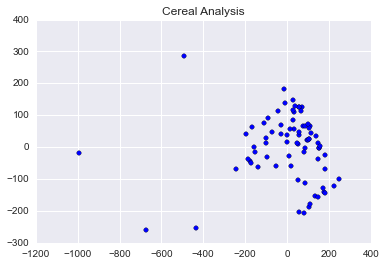

In [96]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title("Cereal Analysis")
plt.show()

Looking at this graph, you can see most of the cereals are clustered together with a few major outliers.  Since this is including all the numerical indicators, it will be interesting to break this down further.

In [115]:
kmeans3 = KMeans(3)
c3_all = kmeans3.fit_predict(reduced_data)

In [92]:
y_pred3

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0], dtype=int32)

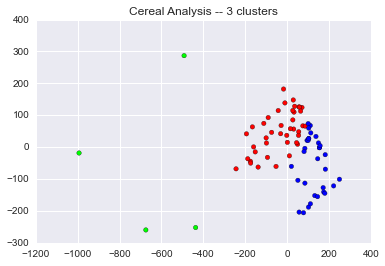

In [116]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=c3_all, cmap="brg")
plt.title("Cereal Analysis -- 3 clusters")
plt.show()

This the same graph, but the clusters are now visible by color.  The major cluster has been split up into two groups, and the outliers have been grouped together.  Again, this will be interesting when we start to include only certain indicators.

In [122]:
burners = maybe[["fat", "protein", "carbo"]]
pca.fit(burners)
reduced_burners = pca.transform(burners)

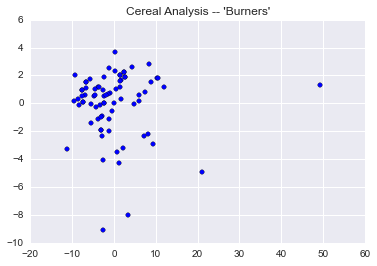

In [123]:
plt.scatter(reduced_burners[:, 0], reduced_burners[:, 1])
plt.title("Cereal Analysis -- 'Burners'")
plt.show()

In this graph, we are looking at just the "burners" or fats, protein, and carbs, things your body burns for energy.  Just as in the first graph, most of the data is clustered very close, and again with 4 major outliers.  This time however, the big cluster isn't quite as closely grouped as before.  I am interested to see the clustered graph.

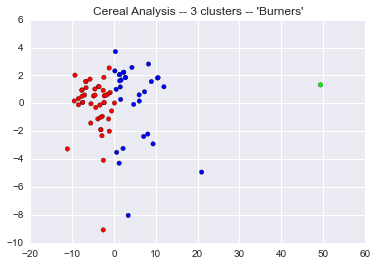

In [125]:
c3_burn = kmeans3.fit_predict(reduced_burners)
plt.scatter(reduced_burners[:, 0], reduced_burners[:, 1], c=c3_burn, cmap="brg")
plt.title("Cereal Analysis -- 3 clusters -- 'Burners'")
plt.show()

This was very interesting.  According to the graph, most of the 'burners' are in two clusters, with a single outlier.  My interpretation of this graph would be that most of the cereals have roughly the same level of burners per cup as the others, with one exception.  Very interesting.